# Car accident Severity Prediction 

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
# To detect encoding of data file
with open("Car_Accident_2020.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
# read csv file, skip on every bad line encountered and remove extra space

df = pd.read_csv('Car_Accident_2020.csv', delimiter=';', encoding= 'ISO-8859-1', on_bad_lines='skip', skipinitialspace= True, engine='python')

In [4]:
df.head(5)

,num_boletim,data_hora_boletim,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,pedestre,passageiro
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NÃO,NÃO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO ...,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NÃO,32,20/11/1987,NaN,NaN,0,0,AUTOMOVEL,N,S
3,2020-014158612-001,20/03/2020 05:39,1,N,1,NAO FATAL,F,SIM,NÃO,72,29/06/1947,NaN,NaN,0,0,ONIBUS,N,S
4,2020-014158612-001,20/03/2020 05:39,2,S,3,SEM FERIMENTOS,M,SIM,NÃO,55,13/03/1965,N,NAO INFORMADO ...,0,0,ONIBUS,N,N


# Data Preprocessing

In [5]:
# rename column name with a dictionary that maps the old column names to the new column names
# Portuguese -> English

rename_column = { 'num_boletim' : 'record_number',
                'data_hora_boletim' : 'registration_date_time',
                'Nº_envolvido' : 'people_involved',
                'condutor' : 'driver_responsible',
                 'cod_severidade' : 'severity_code',
                'desc_severidade' : 'fatal',
                'sexo' :'gender' ,
                'cinto_seguranca' : 'seat_belt',
                'Embreagues' : 'under_alcohol',
                'idade' : 'age',
                'nascimento' : 'birth',
                'categoria_habilitacao' : 'enabling_type',
                'descricao_habilitacao' : 'qualification',
                'declaracao_obito' : 'death',
                'cod_severidade_antiga' : 'old_severity_code',
                'especie_veiculo' : 'vehicle_type',
                'pedestre' : 'pedestrian_involve',
                'passageiro' : 'passenger'

}

In [6]:
column_list = list(rename_column.values())

df.columns = column_list

In [7]:
# Trim all string of a database

df_obj = df.select_dtypes(['object'])

df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22643 entries, 0 to 22642
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   record_number           22643 non-null  object
 1   registration_date_time  22643 non-null  object
 2   people_involved         22643 non-null  int64 
 3   driver_responsible      22643 non-null  object
 4   severity_code           22643 non-null  int64 
 5   fatal                   22643 non-null  object
 6   gender                  22643 non-null  object
 7   seat_belt               22643 non-null  object
 8   under_alcohol           22643 non-null  object
 9   age                     22643 non-null  int64 
 10  birth                   22643 non-null  object
 11  enabling_type           19176 non-null  object
 12  qualification           19176 non-null  object
 13  death                   22643 non-null  int64 
 14  old_severity_code       22643 non-null  int64 
 15  ve

In [9]:
df.shape

(22643, 18)

Car accident registration date time

In [10]:
# convert data time string in registration_date_time to date time format

pd.to_datetime(df['registration_date_time'])

0       2020-03-20 02:18:00
1       2020-03-20 02:18:00
2       2020-03-20 02:18:00
3       2020-03-20 05:39:00
4       2020-03-20 05:39:00
                ...        
22638   2020-12-14 10:15:00
22639   2020-12-14 10:15:00
22640   2020-12-14 10:15:00
22641   2020-12-13 16:20:00
22642   2020-12-13 16:20:00
Name: registration_date_time, Length: 22643, dtype: datetime64[ns]

Age Feature

In [11]:
print(sorted(df['age'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]


In [12]:
# Make age columns categorical by binning

bins = [i for i in range(0, 101, 10)]

labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [13]:
print(df['age_group'].unique().tolist())

['30-40', '40-50', '70-80', '50-60', '20-30', '10-20', '60-70', nan, '80-90', '0-10', '90-100']


In [14]:
# Drop original age 

df = df.drop('age',axis=1)

# Chi-Squared Test

In [15]:
from scipy.stats import chi2_contingency

def chi_square_dependence_test(features : list =None, target_variable : str =None, reject_h0 : float = 0.05) -> list:
    '''
    Param:
    features: dataframe column names, example ['people_involved','gender', 'seat_belt']
    target_variable: feature name, example 'fatal'
    reject_H0: threshold in hypothesis testing

    Function:
    perform chi square test of independence between a list of features and the target feature, return name list of dependent features
    '''

    if features and target_variable is not None:

        dependent_features = []

        for col in df[features]:

            # avoid testing between same column 
            if col != target_variable:

                # Chi-square test
                observed = pd.crosstab(df[col], df[target_variable])

                chi2, p_val, dof, expected = chi2_contingency(observed)

                # add dependent feature into a list
                if p_val < reject_h0:
                    dependent_features.append(col)
                    
                if p_val < reject_h0:
                    print(f"There is a significant dependency between {str(target_variable)} and {col}. p-value: {round(p_val,2)}")
                else:
                    print(f"There is no significant dependency between {str(target_variable)} and {col}. p-value: {round(p_val,2)}")

        return dependent_features

    else:

        raise TypeError("Features and Target_variable parameter cannot be None")
    

# Data Cleaning

In [16]:
# Find duplicate rows across all columns

duplicateRows = df[df.duplicated()]

duplicateRows.sum()

C:\Users\User\AppData\Local\Temp\ipykernel_18804\3777228218.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  duplicateRows.sum()


record_number             0.0
registration_date_time    0.0
people_involved           0.0
driver_responsible        0.0
severity_code             0.0
fatal                     0.0
gender                    0.0
seat_belt                 0.0
under_alcohol             0.0
birth                     0.0
enabling_type             0.0
qualification             0.0
death                     0.0
old_severity_code         0.0
vehicle_type              0.0
pedestrian_involve        0.0
passenger                 0.0
dtype: float64

In [17]:
# Get all columns that have constant value / have same values across all rows for each column.

constant_columns = df.columns[df.nunique() <= 1]

# Drop columns with only one distinct value

for col in constant_columns:
    print(f"drop column: {col} ; value: {df[col].unique()}")
   
df.drop(constant_columns,inplace=True,axis=1)

drop column: death ; value: [0]
drop column: old_severity_code ; value: [0]


In [18]:
missing_values_list = ['NAO INFORMADO','NÃO INFORMADO']

# checking whether any columns in the df contain any of the strings in the missing_values_list, output boolean with any function
nao_informado = df.apply(lambda x: x.astype(str).str.contains('|'.join(missing_values_list)).any())

nao_informado

record_number             False
registration_date_time    False
people_involved           False
driver_responsible        False
severity_code             False
fatal                      True
gender                    False
seat_belt                 False
under_alcohol              True
birth                     False
enabling_type             False
qualification              True
vehicle_type               True
pedestrian_involve        False
passenger                 False
age_group                 False
dtype: bool

In [19]:
# Get columns with nao informado string by boolean indexing and convert it to a list
nao_informado_cols = nao_informado[nao_informado == True].index.tolist()


# Convert string in missing_values_list to np.nan
df[nao_informado_cols] = df[nao_informado_cols].replace(missing_values_list, np.nan)

In [20]:
df.isnull().any()

record_number             False
registration_date_time    False
people_involved           False
driver_responsible        False
severity_code             False
fatal                      True
gender                    False
seat_belt                 False
under_alcohol              True
birth                     False
enabling_type              True
qualification              True
vehicle_type               True
pedestrian_involve         True
passenger                  True
age_group                  True
dtype: bool

In [21]:
# Check Porpotion of missing values

def missing_value_prop() -> None:

    percent_missing = df.isnull().sum() * 100 / len(df)

    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

    print(missing_value_df)

In [22]:
missing_value_prop()

                        percent_missing
qualification                 33.348055
enabling_type                 15.311575
pedestrian_involve             9.512874
passenger                      9.031489
under_alcohol                  5.820783
age_group                      5.644128
vehicle_type                   5.582299
fatal                          2.861812
record_number                  0.000000
registration_date_time         0.000000
people_involved                0.000000
driver_responsible             0.000000
severity_code                  0.000000
gender                         0.000000
seat_belt                      0.000000
birth                          0.000000


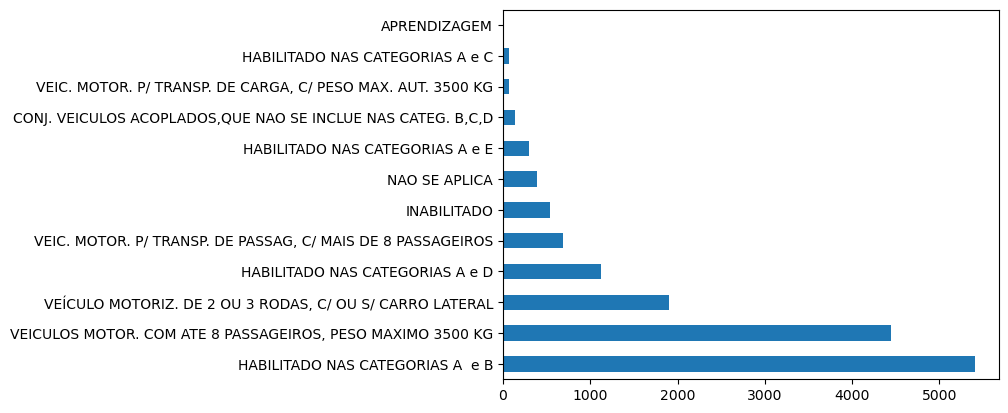

In [23]:
df['qualification'].value_counts().plot(kind='barh')

plt.show()

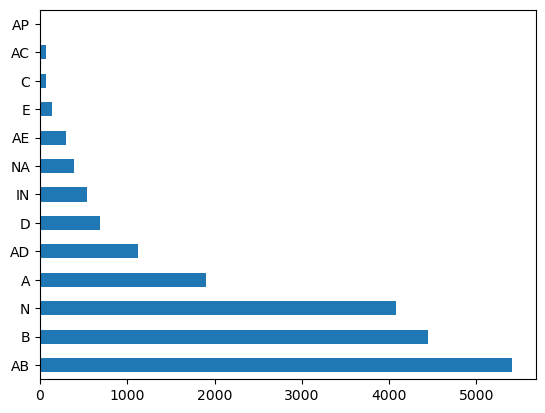

In [24]:
df['enabling_type'].value_counts().plot(kind='barh')

plt.show()

In [25]:
missing_values_cols = chi_square_dependence_test(features=['qualification', 'enabling_type'], target_variable='fatal')

There is a significant dependency between fatal and qualification. p-value: 0.0
There is a significant dependency between fatal and enabling_type. p-value: 0.0


In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

for col in missing_values_cols:

    df[col] = imputer.fit_transform(df[col].values.reshape(-1,1))[:,0]
    

In [27]:
missing_value_prop()

                        percent_missing
pedestrian_involve             9.512874
passenger                      9.031489
under_alcohol                  5.820783
age_group                      5.644128
vehicle_type                   5.582299
fatal                          2.861812
record_number                  0.000000
registration_date_time         0.000000
people_involved                0.000000
driver_responsible             0.000000
severity_code                  0.000000
gender                         0.000000
seat_belt                      0.000000
birth                          0.000000
enabling_type                  0.000000
qualification                  0.000000


In [28]:
df.shape

(22643, 16)

In [29]:
# List of columns with missing values

columns_with_missing_values = df.columns[df.isnull().sum() > 0].tolist()

In [30]:
print(columns_with_missing_values)

['fatal', 'under_alcohol', 'vehicle_type', 'pedestrian_involve', 'passenger', 'age_group']


In [31]:
# Drop rows with missing values

df.dropna(subset = columns_with_missing_values, inplace=True)

In [32]:
missing_value_prop()

                        percent_missing
record_number                       0.0
registration_date_time              0.0
people_involved                     0.0
driver_responsible                  0.0
severity_code                       0.0
fatal                               0.0
gender                              0.0
seat_belt                           0.0
under_alcohol                       0.0
birth                               0.0
enabling_type                       0.0
qualification                       0.0
vehicle_type                        0.0
pedestrian_involve                  0.0
passenger                           0.0
age_group                           0.0


In [33]:
def plot_stacked_bar_chart(x : str, y : str, title : str =None, normalize ='index') -> None:

    ct = pd.crosstab(df[x], df[y], normalize=normalize)

    ax = ct.plot(kind='bar', stacked=True)

    ax.set_xlabel(x)
    ax.set_ylabel(y)

    ax.legend(title=title)

    plt.show()

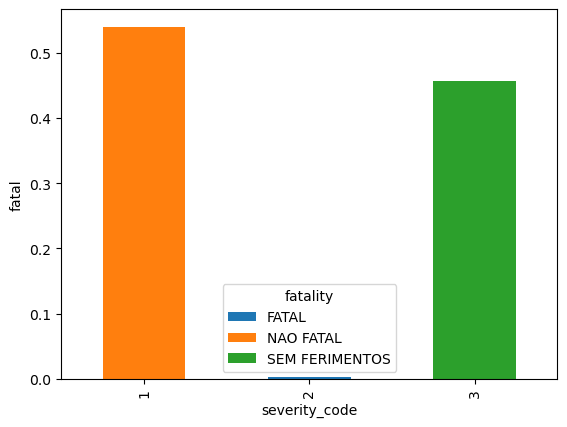

In [34]:
plot_stacked_bar_chart(x='severity_code', y='fatal', title='fatality', normalize='all')

In [35]:
chi_square_dependence_test(features=['severity_code'], target_variable='fatal')

There is a significant dependency between fatal and severity_code. p-value: 0.0


['severity_code']

In [280]:
# Severity code contains information of target variable, drop it to avoid target leakage

df = df.drop('severity_code', axis=1)

# Feature Selection

In [281]:
df.head()

,record_number,registration_date_time,people_involved,driver_responsible,fatal,gender,seat_belt,under_alcohol,birth,enabling_type,qualification,vehicle_type,pedestrian_involve,passenger,age_group
0,2020-014152383-001,20/03/2020 02:18,1,S,NAO FATAL,M,NÃO,NÃO,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",BICICLETA,N,N,30-40
1,2020-014152383-001,20/03/2020 02:18,2,S,SEM FERIMENTOS,F,SIM,SIM,11/03/1978,N,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,N,40-50
2,2020-014152383-001,20/03/2020 02:18,3,N,SEM FERIMENTOS,M,SIM,NÃO,20/11/1987,AB,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,S,30-40
3,2020-014158612-001,20/03/2020 05:39,1,N,NAO FATAL,F,SIM,NÃO,29/06/1947,AB,HABILITADO NAS CATEGORIAS A e B,ONIBUS,N,S,70-80
4,2020-014158612-001,20/03/2020 05:39,2,S,SEM FERIMENTOS,M,SIM,NÃO,13/03/1965,N,HABILITADO NAS CATEGORIAS A e B,ONIBUS,N,N,50-60


In [282]:
dependent_features = chi_square_dependence_test(features=df.columns.to_list(), target_variable='fatal')

There is no significant dependency between fatal and record_number. p-value: 1.0
There is no significant dependency between fatal and registration_date_time. p-value: 1.0
There is a significant dependency between fatal and people_involved. p-value: 0.0
There is a significant dependency between fatal and driver_responsible. p-value: 0.0
There is a significant dependency between fatal and gender. p-value: 0.0
There is a significant dependency between fatal and seat_belt. p-value: 0.0
There is no significant dependency between fatal and under_alcohol. p-value: 0.58
There is no significant dependency between fatal and birth. p-value: 0.95
There is a significant dependency between fatal and enabling_type. p-value: 0.0
There is a significant dependency between fatal and qualification. p-value: 0.0
There is a significant dependency between fatal and vehicle_type. p-value: 0.0
There is no significant dependency between fatal and pedestrian_involve. p-value: 0.65
There is a significant dependen

In [283]:
df[dependent_features].head()

,people_involved,driver_responsible,gender,seat_belt,enabling_type,qualification,vehicle_type,passenger,age_group
0,1,S,M,NÃO,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",BICICLETA,N,30-40
1,2,S,F,SIM,N,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,40-50
2,3,N,M,SIM,AB,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,S,30-40
3,1,N,F,SIM,AB,HABILITADO NAS CATEGORIAS A e B,ONIBUS,S,70-80
4,2,S,M,SIM,N,HABILITADO NAS CATEGORIAS A e B,ONIBUS,N,50-60


In [284]:
chi_square_dependence_test(features=['birth'], target_variable='age_group')

There is a significant dependency between age_group and birth. p-value: 0.0


['birth']

In [285]:
# Remove birth column to reduce redundancy

df = df.drop('birth', axis=1)

In [286]:
target_variable = 'fatal'

X = df[dependent_features]

# X = df.drop('fatal', axis=1)

y = df[target_variable]

In [287]:
X

,people_involved,driver_responsible,gender,seat_belt,enabling_type,qualification,vehicle_type,passenger,age_group
0,1,S,M,NÃO,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",BICICLETA,N,30-40
1,2,S,F,SIM,N,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,40-50
2,3,N,M,SIM,AB,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,S,30-40
3,1,N,F,SIM,AB,HABILITADO NAS CATEGORIAS A e B,ONIBUS,S,70-80
4,2,S,M,SIM,N,HABILITADO NAS CATEGORIAS A e B,ONIBUS,N,50-60
...,...,...,...,...,...,...,...,...,...
22635,2,S,M,SIM,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",AUTOMOVEL,N,30-40
22637,2,S,M,SIM,N,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,20-30
22638,1,S,M,SIM,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",AUTOMOVEL,N,30-40
22640,3,S,M,SIM,E,"CONJ. VEICULOS ACOPLADOS,QUE NAO SE INCLUE NAS...",ONIBUS,N,30-40


# Data Encoding

In [288]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(X)

feature_names = ohe.get_feature_names_out(input_features=X.columns)

X_encoded = pd.DataFrame(ohe.transform(X), columns=feature_names)

In [289]:
print(X_encoded.columns.to_list())

['people_involved_1', 'people_involved_2', 'people_involved_3', 'people_involved_4', 'people_involved_5', 'people_involved_6', 'people_involved_7', 'people_involved_8', 'people_involved_9', 'people_involved_10', 'people_involved_11', 'people_involved_12', 'people_involved_13', 'people_involved_14', 'people_involved_15', 'people_involved_16', 'people_involved_17', 'driver_responsible_N', 'driver_responsible_S', 'gender_0', 'gender_F', 'gender_M', 'seat_belt_NÃO', 'seat_belt_SIM', 'enabling_type_A', 'enabling_type_AB', 'enabling_type_AC', 'enabling_type_AD', 'enabling_type_AE', 'enabling_type_AP', 'enabling_type_B', 'enabling_type_C', 'enabling_type_D', 'enabling_type_E', 'enabling_type_IN', 'enabling_type_N', 'enabling_type_NA', 'qualification_APRENDIZAGEM', 'qualification_CONJ. VEICULOS ACOPLADOS,QUE NAO SE INCLUE NAS CATEG. B,C,D', 'qualification_HABILITADO NAS CATEGORIAS A  e B', 'qualification_HABILITADO NAS CATEGORIAS A e C', 'qualification_HABILITADO NAS CATEGORIAS A e D', 'qualif

In [290]:
X_encoded

,people_involved_1,people_involved_2,people_involved_3,people_involved_4,people_involved_5,people_involved_6,people_involved_7,people_involved_8,people_involved_9,people_involved_10,...,age_group_0-10,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70-80,age_group_80-90,age_group_90-100
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19151,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19152,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y_encoded = pd.Series(lb.fit_transform(y))

print("Encoded labels:",lb.classes_)

Encoded labels: ['FATAL' 'NAO FATAL' 'SEM FERIMENTOS']


In [292]:
y_encoded

0        1
1        2
2        2
3        1
4        2
        ..
19151    2
19152    2
19153    2
19154    2
19155    2
Length: 19156, dtype: int32

In [293]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X_encoded, y_encoded)

# extract column name of selected features
cols = selector.get_feature_names_out()

# convert selected features into dataframe
feature_selection_df = pd.DataFrame(X_selected, columns=cols)

In [294]:
feature_selection_df

,driver_responsible_N,enabling_type_B,"qualification_VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MAXIMO 3500 KG",vehicle_type_AUTOMOVEL,vehicle_type_MOTOCICLETA
0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
19151,0.0,1.0,1.0,1.0,0.0
19152,0.0,0.0,0.0,1.0,0.0
19153,0.0,1.0,1.0,1.0,0.0
19154,0.0,0.0,0.0,0.0,0.0


# Train Validation Test Split

In [295]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Oversampling

In [296]:
import sys

!{sys.executable} -m pip install imbalanced-learn

In [297]:
from imblearn.over_sampling import SMOTE, SMOTEN

# Generate synthetic samples for the minority class

smoten = SMOTEN()

X_train_resampled, y_train_resampled = smoten.fit_resample(feature_selection_df, y_encoded)

In [298]:
X_train_resampled.shape, y_train_resampled.shape

((31029, 5), (31029,))

In [299]:
print(y_train_resampled.value_counts())

1    10343
2    10343
0    10343
dtype: int64


# Machine Learning

In [300]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score

In [301]:
from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [302]:
def plot_classification_report_heatmap(y_test, y_pred, title='Classification Report') -> None:

    clf = classification_report(y_test, y_pred, target_names=['Fatal', 'Non Fatal', 'No injuries'], zero_division=0, output_dict=True)

    ax = plt.axes()

    sns.heatmap(pd.DataFrame(clf).iloc[:-1, :].T, annot=True, cmap="Blues")

    ax.set_title(title)
    plt.show()

In [303]:
def plot_confusion_matrix(cf, title='Confusion Matrix') -> None:

    cnf_matrix_n = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]

    class_names=['Fatal', 'Non Fatal', 'No injuries']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))

    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix_n), annot=True, cmap="YlGnBu")
    ax.xaxis.set_label_position("top")
    plt.tight_layout()

    plt.title(title , y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.show()

# SVM

In [304]:
from imblearn.pipeline import Pipeline as imb_pipeline
from sklearn.svm import SVC

pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('sampling', SMOTEN()),
    ('classifier', SVC())
])

In [305]:
pipeline.fit(X_train, y_train)

svc_y_pred = pipeline.predict(X_test)

print('SVM accuracy score:',accuracy_score(y_test, svc_y_pred))

SVM accuracy score: 0.6059498956158664


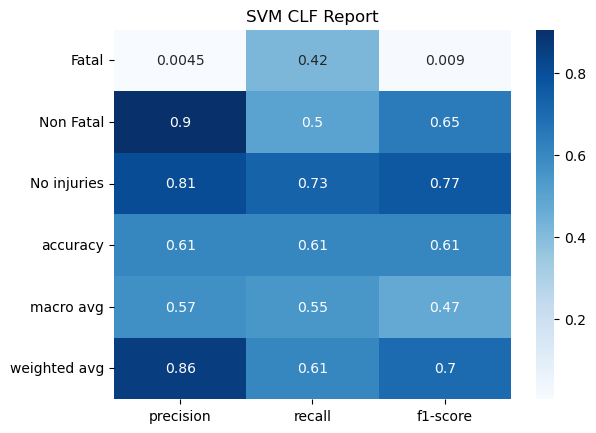

In [306]:
plot_classification_report_heatmap(y_test, svc_y_pred, title='SVM CLF Report')

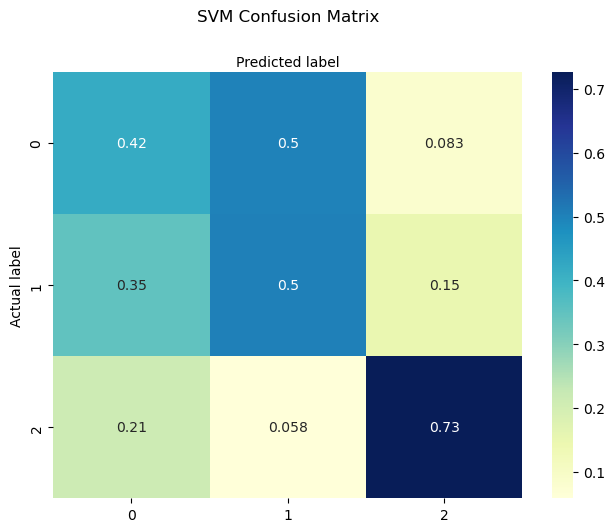

In [307]:
cnf_matrix_svm = confusion_matrix(y_test, svc_y_pred)

plot_confusion_matrix(cnf_matrix_svm, title='SVM Confusion Matrix')

# SVM With Hyperparameters Tuning

In [308]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('classifier', SVC())
])

In [309]:
hyperparameters = {
    'feature_selection__k': [5, 10, 15, 20, 30, 40, 'all'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['linear', 'poly', 'rbf']
}

In [310]:
from sklearn.model_selection import GridSearchCV

In [311]:
# Cross Validation and hyperparameters tuning

grid_search = GridSearchCV(pipeline, hyperparameters, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

svc_val_score = grid_search.score(X_val, y_val)
print("Validation accuracy:", svc_val_score)

svc_test_score = grid_search.score(X_test, y_test)
print("Test accuracy:", svc_test_score)

svc_best_params = grid_search.best_params_
print("Best hyperparameters: ", svc_best_params)

Validation accuracy: 0.8766721044045677
Test accuracy: 0.8820459290187892
Best hyperparameters:  {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'feature_selection__k': 'all'}


In [312]:
svc_pipeline = imb_pipeline([
    ('preprocessor', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2, k=svc_best_params['feature_selection__k'])),
    ('sampling', SMOTEN()),
    ('classifier', SVC(C=svc_best_params['classifier__C'], 
                       gamma=svc_best_params['classifier__gamma'], 
                       kernel=svc_best_params['classifier__kernel']))
])

In [313]:
svc_pipeline.fit(X_train, y_train)

svc_y_pred = svc_pipeline.predict(X_test)

print('Accuracy score:',accuracy_score(y_test, svc_y_pred))


Accuracy score: 0.8820459290187892


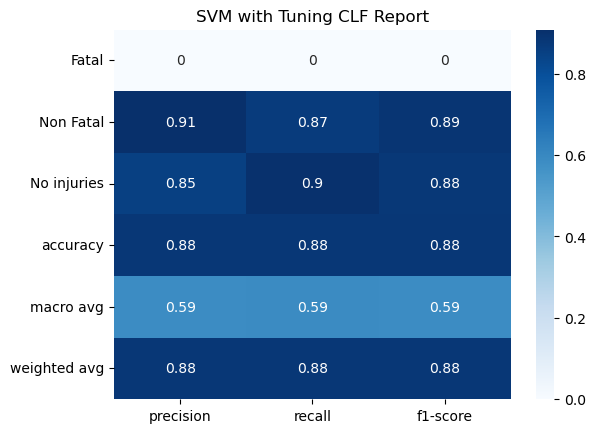

In [314]:
plot_classification_report_heatmap(y_test, svc_y_pred, title='SVM with Tuning CLF Report')

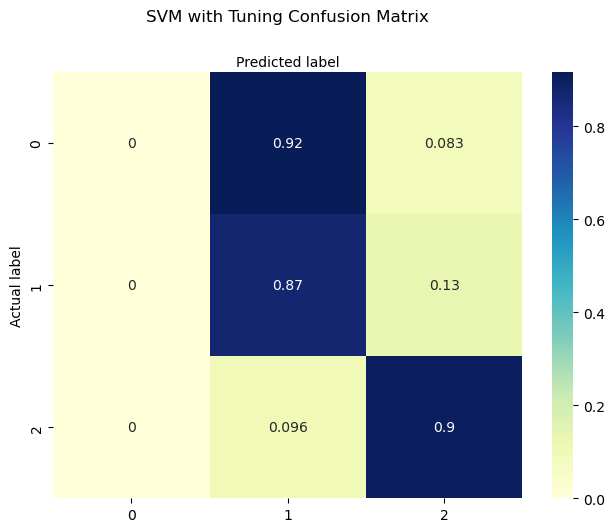

In [315]:
cnf_matrix_svm = confusion_matrix(y_test, svc_y_pred)

plot_confusion_matrix(cnf_matrix_svm, title='SVM with Tuning Confusion Matrix')

In [316]:
y_pred1 = svc_y_pred

# fit and transform the data using the label encoder
y_test_encoded = lb.fit_transform(y_test.to_numpy())
y_pred_encoded = lb.fit_transform(y_pred1)

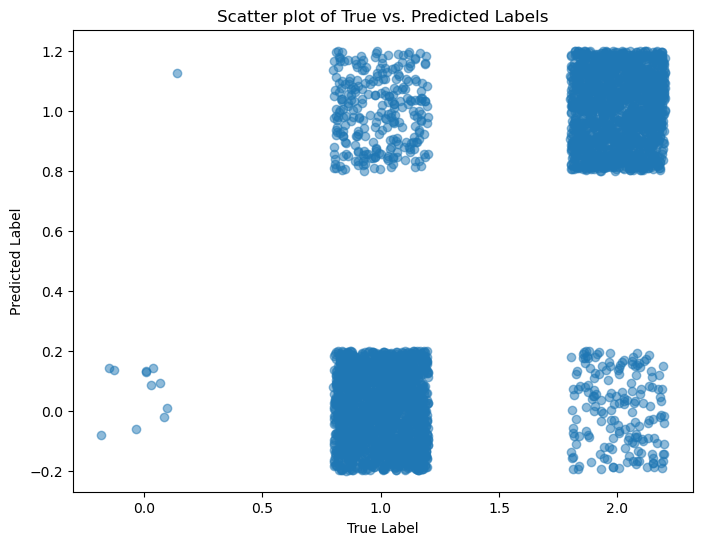

In [317]:
# Perform jittering
jitter = 0.2
y_true_jittered = pd.Series(y_test_encoded).astype(float).apply(lambda x: x + np.random.uniform(-jitter, jitter))
y_pred_jittered = pd.Series(y_pred_encoded).astype(float).apply(lambda x: x + np.random.uniform(-jitter, jitter))

# Plot the data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_true_jittered, y_pred_jittered, alpha=0.5)

ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.set_title('Scatter plot of True vs. Predicted Labels')

plt.show()

# Decision Tree

In [318]:
from sklearn.tree import DecisionTreeClassifier

pipeline = imb_pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('sampling', SMOTEN()),
    ('classifier', DecisionTreeClassifier())
])

In [319]:
pipeline.fit(X_train, y_train)

decision_tree_y_pred = pipeline.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
print('Decision Tree accuracy score:', decision_tree_accuracy)

Decision Tree accuracy score: 0.6059498956158664


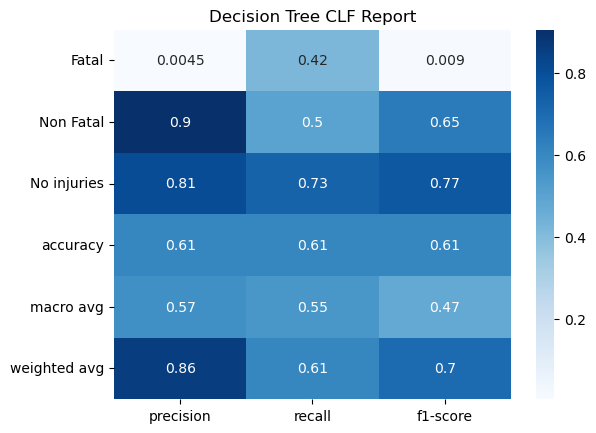

In [320]:
plot_classification_report_heatmap(y_test, decision_tree_y_pred, title='Decision Tree CLF Report')

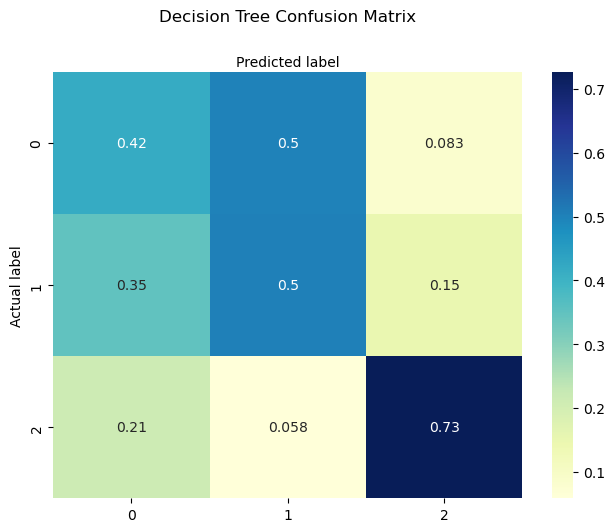

In [321]:
cnf_matrix_dt = confusion_matrix(y_test, decision_tree_y_pred)

plot_confusion_matrix(cnf_matrix_dt, title='Decision Tree Confusion Matrix')

# Decision Tree with Hyperparameters Tuning

In [322]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('classifier', DecisionTreeClassifier())
])

In [323]:
hyperparameters = {
    'feature_selection__k': [5, 10, 15, 20, 30, 40, 'all'],
    'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random']
}

In [324]:
grid_search = GridSearchCV(pipeline, hyperparameters, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

decision_tree_val_score = grid_search.score(X_val, y_val)
print("Validation accuracy:", decision_tree_val_score)

decision_tree_test_score = grid_search.score(X_test, y_test)
print("Test accuracy:", decision_tree_test_score)

decision_tree_best_params = grid_search.best_params_
print("Best hyperparameters: ", decision_tree_best_params)

Validation accuracy: 0.8753670473083197
Test accuracy: 0.8817849686847599
Best hyperparameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 6, 'classifier__splitter': 'best', 'feature_selection__k': 30}


In [325]:
decision_tree_pipeline = imb_pipeline([
    ('preprocessor', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2, k=decision_tree_best_params['feature_selection__k'])),
    ('sampling', SMOTEN()),
    ('classifier', DecisionTreeClassifier(max_depth=decision_tree_best_params['classifier__max_depth'], 
                                          criterion=decision_tree_best_params['classifier__criterion'], 
                                          splitter=decision_tree_best_params['classifier__splitter']))
])

In [326]:
decision_tree_pipeline.fit(X_train, y_train)

decision_tree_y_pred = decision_tree_pipeline.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
print('Decision Tree with tuning accuracy score:', decision_tree_accuracy)

Decision Tree with tuning accuracy score: 0.6281315240083507


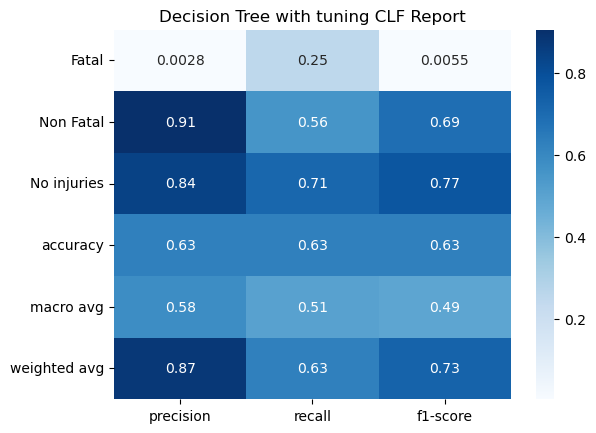

In [327]:
plot_classification_report_heatmap(y_test, decision_tree_y_pred, title='Decision Tree with tuning CLF Report')

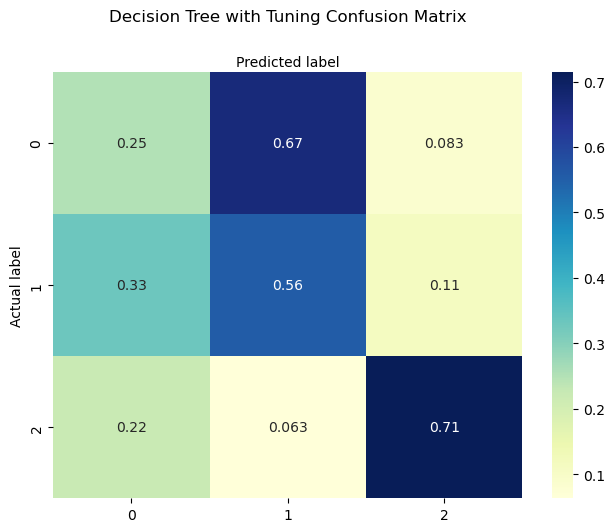

In [328]:
cnf_matrix_dt = confusion_matrix(y_test, decision_tree_y_pred)

plot_confusion_matrix(cnf_matrix_dt, title='Decision Tree with Tuning Confusion Matrix')

# Random Forest

In [329]:
from sklearn.ensemble import RandomForestClassifier

pipeline = imb_pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('sampling', SMOTEN()),
    ('classifier', RandomForestClassifier())
])

In [330]:
pipeline.fit(X_train, y_train)

random_forest_y_pred = pipeline.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
print('Random Forest accuracy score:', random_forest_accuracy)

Random Forest accuracy score: 0.6059498956158664


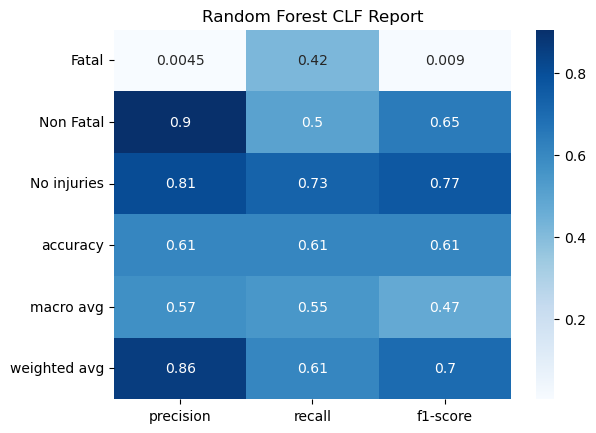

In [331]:
plot_classification_report_heatmap(y_test, random_forest_y_pred, title='Random Forest CLF Report')

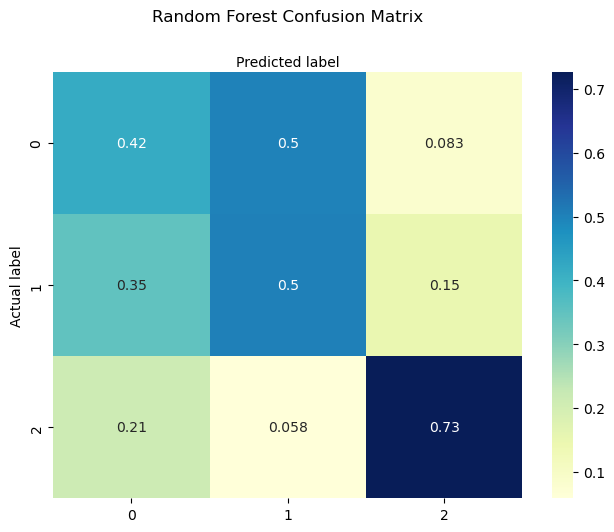

In [332]:
cnf_matrix_rf = confusion_matrix(y_test, random_forest_y_pred)

plot_confusion_matrix(cnf_matrix_rf, title='Random Forest Confusion Matrix')

# Random Forest With Hyperparameters Tuning

In [333]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('classifier', RandomForestClassifier())
])

In [334]:
hyperparameters = {
    'feature_selection__k': [5, 10, 15, 20, 30, 40, 'all'],
    'classifier__bootstrap': [True, False],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10, 15, 20],
    'classifier__n_estimators': [100, 200, 300]}

In [335]:
grid_search = GridSearchCV(pipeline, hyperparameters, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

random_forest_val_score = grid_search.score(X_val, y_val)
print("Validation accuracy:", random_forest_val_score)

random_forest_test_score = grid_search.score(X_test, y_test)
print("Test accuracy:", random_forest_test_score)

random_forest_best_params = grid_search.best_params_
print("Best hyperparameters: ", random_forest_best_params)

Validation accuracy: 0.8766721044045677
Test accuracy: 0.8820459290187892
Best hyperparameters:  {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300, 'feature_selection__k': 'all'}


In [336]:
random_forest_pipeline = imb_pipeline([
    ('preprocessor', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2, k=random_forest_best_params['feature_selection__k'])),
    ('sampling', SMOTEN()),
    ('classifier', RandomForestClassifier(bootstrap=random_forest_best_params['classifier__bootstrap'], 
                                          max_depth=random_forest_best_params['classifier__max_depth'], 
                                          max_features=random_forest_best_params['classifier__max_features'], 
                                          min_samples_leaf=random_forest_best_params['classifier__min_samples_leaf'], 
                                          min_samples_split=random_forest_best_params['classifier__min_samples_split'], 
                                          n_estimators=random_forest_best_params['classifier__n_estimators']))
])

In [337]:
random_forest_pipeline.fit(X_train, y_train)

random_forest_y_pred = decision_tree_pipeline.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
print('Random Forest with tuning accuracy score:', random_forest_accuracy)

Random Forest with tuning accuracy score: 0.6281315240083507


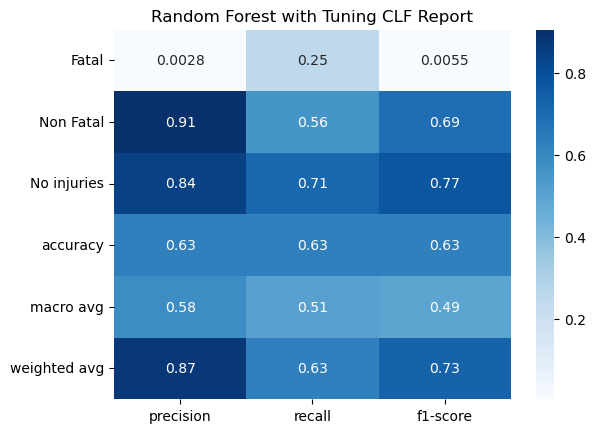

In [338]:
plot_classification_report_heatmap(y_test, random_forest_y_pred, title='Random Forest with Tuning CLF Report')

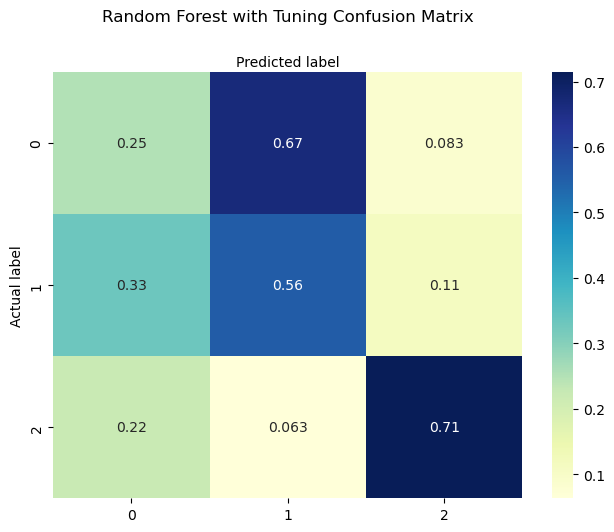

In [339]:
cnf_matrix_rf = confusion_matrix(y_test, random_forest_y_pred)

plot_confusion_matrix(cnf_matrix_rf, title='Random Forest with Tuning Confusion Matrix')

# Logistic Regression

In [340]:
from sklearn.linear_model import LogisticRegression

pipeline = imb_pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('sampling', SMOTEN()),
    ('classifier', LogisticRegression())
])

In [341]:
pipeline.fit(X_train, y_train)

logistic_regression_y_pred = pipeline.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_y_pred)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

Logistic Regression Accuracy: 0.721294363256785


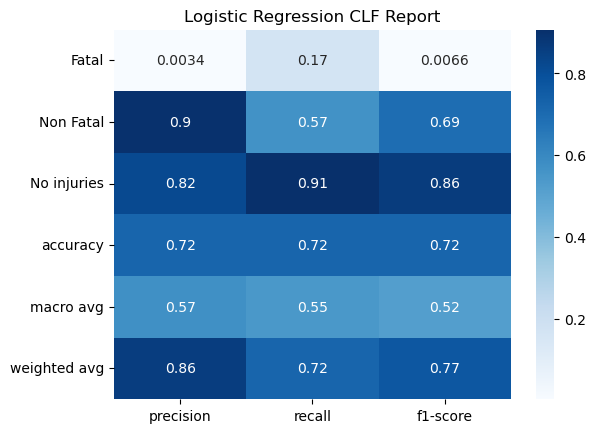

In [342]:
plot_classification_report_heatmap(y_test, logistic_regression_y_pred, title='Logistic Regression CLF Report')

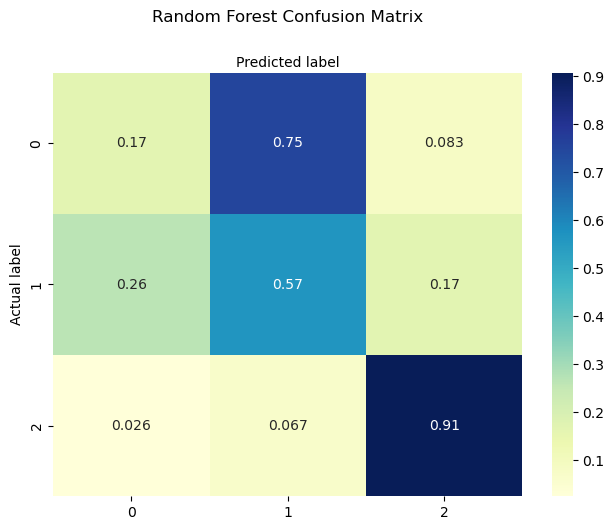

In [343]:
cnf_matrix_lr = confusion_matrix(y_test, logistic_regression_y_pred)

plot_confusion_matrix(cnf_matrix_lr, title='Random Forest Confusion Matrix')

# Logistic Regression with Hyperparameters Tuning

In [344]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('classifier', LogisticRegression())
])

In [345]:
hyperparameters = {
    'feature_selection__k': [5, 10, 15, 20, 30, 40, 'all'],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['newton-cg', 'lbfgs'],
    'classifier__multi_class': ['auto', 'ovr', 'multinomial'],
    'classifier__max_iter': [100, 200, 300]}

In [346]:
grid_search = GridSearchCV(pipeline, hyperparameters, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

logistic_regression_val_score = grid_search.score(X_val, y_val)
print("Validation accuracy:", logistic_regression_val_score)

logistic_regression_test_score = grid_search.score(X_test, y_test)
print("Test accuracy:", logistic_regression_test_score)

logistic_regression_best_params = grid_search.best_params_
print("Best hyperparameters: ", logistic_regression_best_params)

Validation accuracy: 0.8766721044045677
Test accuracy: 0.8820459290187892
Best hyperparameters:  {'classifier__C': 1.0, 'classifier__max_iter': 100, 'classifier__multi_class': 'ovr', 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg', 'feature_selection__k': 'all'}


In [347]:
logistic_regression_pipeline = imb_pipeline([
    ('preprocessor', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2, k=logistic_regression_best_params['feature_selection__k'])),
    ('sampling', SMOTEN()),
    ('classifier', LogisticRegression(C=logistic_regression_best_params['classifier__C'], 
                                      penalty=logistic_regression_best_params['classifier__penalty'], 
                                      solver=logistic_regression_best_params['classifier__solver'], 
                                      multi_class=logistic_regression_best_params['classifier__multi_class'], 
                                      max_iter=logistic_regression_best_params['classifier__max_iter']))
])

In [348]:
logistic_regression_pipeline.fit(X_train, y_train)

logistic_regression_y_pred = logistic_regression_pipeline.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_y_pred)
print("Logistic Regression with tuning accuracy score:", logistic_regression_accuracy)

Logistic Regression with tuning accuracy score: 0.8817849686847599


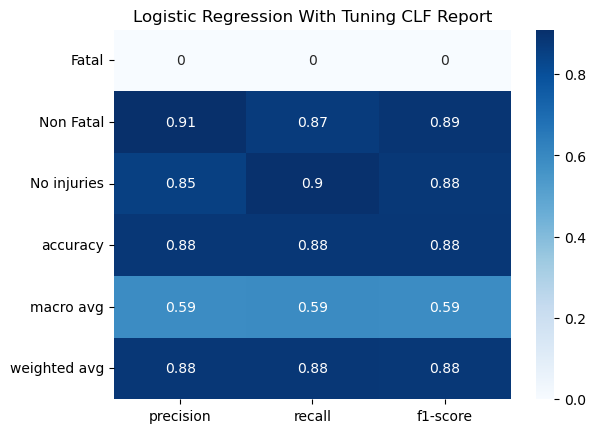

In [349]:
plot_classification_report_heatmap(y_test, logistic_regression_y_pred, title='Logistic Regression With Tuning CLF Report')

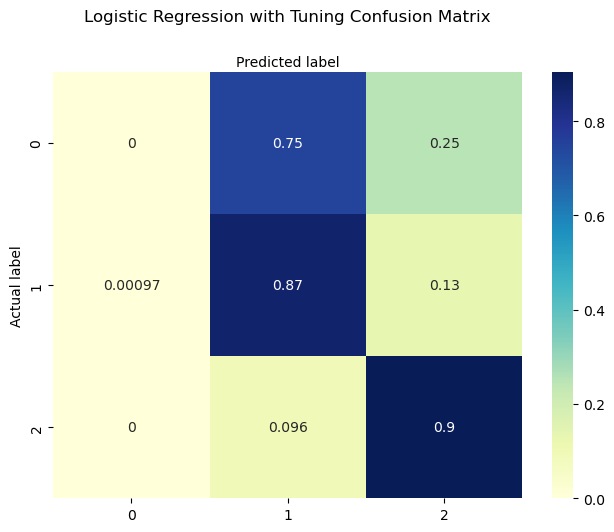

In [350]:
cnf_matrix_lr = confusion_matrix(y_test, logistic_regression_y_pred)

plot_confusion_matrix(cnf_matrix_lr, title='Logistic Regression with Tuning Confusion Matrix')